In [1]:
from sklearn.datasets import make_multilabel_classification
from torch.utils.data import Dataset
import torch

In [2]:
def make_dataset():
    x, y = make_multilabel_classification(
        n_samples=10000, n_features=150, n_classes=6, n_labels=2, random_state=1
    )
    # use 9900 samples for training
    x_train = x[:9900]
    y_train = y[:9900]
    # use 100 samples for testing
    x_test = x[-100:]
    y_test = y[-100:]
    return x_train, y_train, x_test, y_test

In [3]:
dataset = make_dataset()

In [4]:
type(dataset[1][1][0])

numpy.int64

In [5]:
dataset

(array([[0., 0., 2., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 3.],
        [0., 0., 0., ..., 1., 1., 0.],
        [1., 0., 1., ..., 1., 0., 0.]]),
 array([[0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 0],
        ...,
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0]]),
 array([[2., 0., 1., ..., 1., 0., 2.],
        [0., 0., 1., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 1., 0.]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0],
        [1, 0, 0, 1, 0, 1],
        [1, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 0],
        [0,

In [6]:
class BinaryDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        features = self.x[index, :]
        labels = self.y[index, :]
        
        # we have 12 feature columns 
        features = torch.tensor(features, dtype=torch.float32)
        # there are 5 classes and each class can have a binary value ...
        # ... either 0 or 1
        label1 = torch.tensor(labels[0], dtype=torch.float32)
        label2 = torch.tensor(labels[1], dtype=torch.float32)
        label3 = torch.tensor(labels[2], dtype=torch.float32)
        label4 = torch.tensor(labels[3], dtype=torch.float32)
        label5 = torch.tensor(labels[4], dtype=torch.float32)
        label6 = torch.tensor(labels[4], dtype=torch.float32)

        return {
            'features': features,
            'label1': label1,
            'label2': label2,
            'label3': label3,
            'label4': label4,
            'label5': label5,
            'label6': label6
        }

In [7]:
BinaryDataset(dataset[0], dataset[1])

In [8]:
bin_dataset = BinaryDataset(dataset[0], dataset[1])

In [9]:
bin_dataset[0]['features']

tensor([0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 1., 0., 0., 0.,
        2., 0., 2., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 2., 0.,
        2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1., 0., 1., 2., 0., 0., 0., 0.,
        0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0.])

In [10]:
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class MultiHeadBinaryModel(nn.Module):
    def __init__(self):
        super(MultiHeadBinaryModel, self).__init__()
        self.fc1 = nn.Linear(150, 32) # 150 is the number of features
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 256)
        
        # we will treat each head as a binary classifier ...
        # ... so the output features will be 1
        self.out1 = nn.Linear(256, 1)
        self.out2 = nn.Linear(256, 1)
        self.out3 = nn.Linear(256, 1)
        self.out4 = nn.Linear(256, 1)
        self.out5 = nn.Linear(256, 1)
        self.out6 = nn.Linear(256, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        # each binary classifier head will have its own output
        out1 = F.sigmoid(self.out1(x))
        out2 = F.sigmoid(self.out2(x))
        out3 = F.sigmoid(self.out3(x))
        out4 = F.sigmoid(self.out4(x))
        out5 = F.sigmoid(self.out5(x))
        out6 = F.sigmoid(self.out6(x))
        
        return out1, out2, out3, out4, out5, out6

In [12]:
import torch.nn as nn
# custom loss function for multi-head binary classification
def binary_loss_fn(outputs, targets):
    o1, o2, o3, o4, o5, o6 = outputs
    t1, t2, t3, t4, t5, t6 = targets
    l1 = nn.BCELoss()(o1, t1)
    l2 = nn.BCELoss()(o2, t2)
    l3 = nn.BCELoss()(o3, t3)
    l4 = nn.BCELoss()(o4, t4)
    l5 = nn.BCELoss()(o5, t5)
    l6 = nn.BCELoss()(o6, t6)
    return (l1 + l2 + l3 + l4 + l5 + l6) / 5

In [13]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [31]:
# prepare the dataset
x_train, y_train, _, _ = make_dataset()
# print some info
print(f"[INFO]: Number of training samples: {x_train.shape[0]}")
print(f"[INFO]: Number of training features: {x_train.shape[1]}")
# train dataset
train_dataset = BinaryDataset(x_train, y_train)
# train data loader
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
# initialize the model
model = MultiHeadBinaryModel()

[INFO]: Number of training samples: 9900
[INFO]: Number of training features: 150


In [33]:
next(iter(train_dataloader))['features'].shape

torch.Size([16, 150])

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 100
# load the model on to the computation device
model.to(device)

MultiHeadBinaryModel(
  (fc1): Linear(in_features=150, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=256, bias=True)
  (out1): Linear(in_features=256, out_features=1, bias=True)
  (out2): Linear(in_features=256, out_features=1, bias=True)
  (out3): Linear(in_features=256, out_features=1, bias=True)
  (out4): Linear(in_features=256, out_features=1, bias=True)
  (out5): Linear(in_features=256, out_features=1, bias=True)
  (out6): Linear(in_features=256, out_features=1, bias=True)
)

In [37]:
model.train()
for data in train_dataloader:

    # extract the features and labels
    features = data['features'].to(device)
    target1 = data['label1'].to(device)
    target2 = data['label2'].to(device)
    target3 = data['label3'].to(device)
    target4 = data['label4'].to(device)
    target5 = data['label5'].to(device)
    target6 = data['label6'].to(device)
    
    
    outputs = model(features)
    targets = (target1, target2, target3, target4, target5, target6)

    print(outputs)
    print(targets)

    break

(tensor([[0.4883],
        [0.4909],
        [0.4907],
        [0.4919],
        [0.4928],
        [0.4922],
        [0.4899],
        [0.4916],
        [0.4904],
        [0.4909],
        [0.4899],
        [0.4910],
        [0.4933],
        [0.4915],
        [0.4924],
        [0.4930]], grad_fn=<SigmoidBackward>), tensor([[0.4881],
        [0.4873],
        [0.4863],
        [0.4869],
        [0.4863],
        [0.4868],
        [0.4860],
        [0.4871],
        [0.4865],
        [0.4885],
        [0.4870],
        [0.4873],
        [0.4888],
        [0.4889],
        [0.4874],
        [0.4858]], grad_fn=<SigmoidBackward>), tensor([[0.4993],
        [0.4987],
        [0.4992],
        [0.5000],
        [0.4969],
        [0.4973],
        [0.4965],
        [0.4992],
        [0.4980],
        [0.4986],
        [0.4988],
        [0.4953],
        [0.4989],
        [0.4981],
        [0.4975],
        [0.4999]], grad_fn=<SigmoidBackward>), tensor([[0.4803],
        [0.4797],
        [0.4

In [16]:
# training function
def train(model, dataloader, optimizer, loss_fn, train_dataset, device):
    model.train()
    counter = 0
    train_running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_dataset)/dataloader.batch_size)):
        counter += 1
        
        # extract the features and labels
        features = data['features'].to(device)
        target1 = data['label1'].to(device)
        target2 = data['label2'].to(device)
        target3 = data['label3'].to(device)
        target4 = data['label4'].to(device)
        target5 = data['label5'].to(device)
        target6 = data['label6'].to(device)
        
        # zero-out the optimizer gradients
        optimizer.zero_grad()
        
        outputs = model(features)
        targets = (target1, target2, target3, target4, target5, target6)
        loss = loss_fn(outputs, targets)
        train_running_loss += loss.item()
        
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
    train_loss = train_running_loss / counter
    return train_loss

In [17]:
# learning parameters
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 100
# load the model on to the computation device
model.to(device)

MultiHeadBinaryModel(
  (fc1): Linear(in_features=150, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=256, bias=True)
  (out1): Linear(in_features=256, out_features=1, bias=True)
  (out2): Linear(in_features=256, out_features=1, bias=True)
  (out3): Linear(in_features=256, out_features=1, bias=True)
  (out4): Linear(in_features=256, out_features=1, bias=True)
  (out5): Linear(in_features=256, out_features=1, bias=True)
  (out6): Linear(in_features=256, out_features=1, bias=True)
)

In [18]:
# start the training
train_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, train_dataloader, optimizer, binary_loss_fn, train_dataset, device
    )
    train_loss.append(train_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
torch.save(model.state_dict(), 'outputs/multi_head_binary.pth')

Epoch 1 of 100


  0%|          | 0/9 [00:00<?, ?it/s]/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
100%|██████████| 9/9 [00:03<00:00,  4.41it/s]/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([684])) that is different to the input size (torch.Size([684, 1])) is deprecated. Please ensure they have the same size.
  

Train Loss: 0.8026
Epoch 2 of 100


10it [00:02,  4.07it/s]


Train Loss: 0.6905
Epoch 3 of 100


10it [00:02,  4.76it/s]                      


Train Loss: 0.6513
Epoch 4 of 100


10it [00:01,  6.15it/s]                      


Train Loss: 0.6379
Epoch 5 of 100


10it [00:01,  6.66it/s]                      


Train Loss: 0.6153
Epoch 6 of 100


10it [00:01,  9.09it/s]                      


Train Loss: 0.5797
Epoch 7 of 100


10it [00:01,  8.40it/s]                      


Train Loss: 0.5463
Epoch 8 of 100


10it [00:01,  8.68it/s]                      


Train Loss: 0.5234
Epoch 9 of 100


10it [00:01,  7.44it/s]


Train Loss: 0.5095
Epoch 10 of 100


10it [00:01,  5.74it/s]                      


Train Loss: 0.4939
Epoch 11 of 100


10it [00:01,  6.22it/s]


Train Loss: 0.4723

KeyboardInterrupt: 

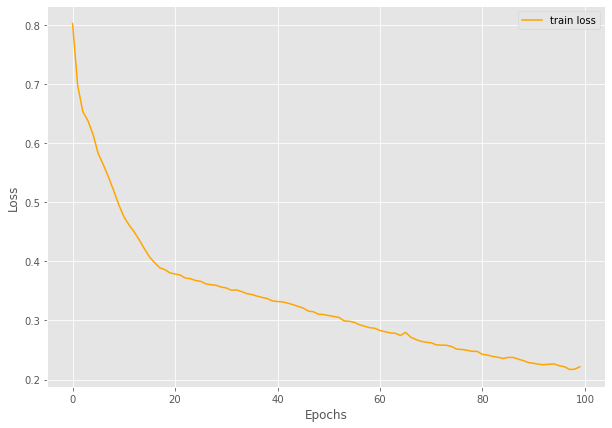

In [ ]:
# plot and save the train loss graph
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('outputs/multi_head_binary_loss.png')
plt.show()

In [ ]:
from torch.utils.data import DataLoader
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
_, _, x_test, y_test = make_dataset()
# print some info
print(f"[INFO]: Number of test samples: {x_test.shape[0]}")
print(f"[INFO]: Number of test features: {x_test.shape[1]}")
test_dataset = BinaryDataset(x_test, y_test)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=1)

[INFO]: Number of test samples: 100
[INFO]: Number of test features: 150


In [ ]:
next(iter(train_loader))[0].shape

In [ ]:
# prepare the trained model
model = MultiHeadBinaryModel()
model.load_state_dict(torch.load('outputs/multi_head_binary.pth'))
model.to(device)
model.eval()

MultiHeadBinaryModel(
  (fc1): Linear(in_features=150, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=256, bias=True)
  (out1): Linear(in_features=256, out_features=1, bias=True)
  (out2): Linear(in_features=256, out_features=1, bias=True)
  (out3): Linear(in_features=256, out_features=1, bias=True)
  (out4): Linear(in_features=256, out_features=1, bias=True)
  (out5): Linear(in_features=256, out_features=1, bias=True)
  (out6): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
for i, test_sample in enumerate(test_dataloader):
    print(f"SAMPLE {i}")
    # extract the features and labels
    features = test_sample['features'].to(device)
    target1 = test_sample['label1'].to(device)
    target2 = test_sample['label2'].to(device)
    target3 = test_sample['label3'].to(device)
    target4 = test_sample['label4'].to(device)
    target5 = test_sample['label5'].to(device)
    target6 = test_sample['label6'].to(device)
    
    outputs = model(features)
            
    # get all the labels
    all_labels = []
    for out in outputs:
        if out >= 0.5:
            all_labels.append(1)
        else:
            all_labels.append(0)
    
    targets = (target1, target2, target3, target4, target5, target6)
    
    # get all the targets in int format from tensor format
    all_targets = []
    for target in targets:
        all_targets.append(int(target.squeeze(0).detach().cpu()))
            
    print(f"ALL PREDICTIONS: {all_labels}")
    print(f"GROUND TRUTHS: {all_targets}")

SAMPLE 0
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 1
ALL PREDICTIONS: [0, 1, 0, 0, 0, 0]
GROUND TRUTHS: [1, 1, 0, 0, 0, 0]
SAMPLE 2
ALL PREDICTIONS: [0, 1, 0, 0, 0, 0]
GROUND TRUTHS: [0, 1, 0, 0, 0, 0]
SAMPLE 3
ALL PREDICTIONS: [0, 1, 0, 1, 0, 0]
GROUND TRUTHS: [0, 1, 0, 1, 1, 1]
SAMPLE 4
ALL PREDICTIONS: [1, 1, 0, 1, 1, 1]
GROUND TRUTHS: [1, 0, 0, 1, 0, 0]
SAMPLE 5
ALL PREDICTIONS: [0, 1, 0, 1, 0, 0]
GROUND TRUTHS: [1, 1, 0, 1, 0, 0]
SAMPLE 6
ALL PREDICTIONS: [1, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 7
ALL PREDICTIONS: [1, 0, 0, 0, 0, 0]
GROUND TRUTHS: [1, 0, 0, 0, 0, 0]
SAMPLE 8
ALL PREDICTIONS: [1, 0, 0, 0, 0, 0]
GROUND TRUTHS: [1, 0, 0, 0, 0, 0]
SAMPLE 9
ALL PREDICTIONS: [0, 0, 0, 1, 0, 0]
GROUND TRUTHS: [0, 1, 0, 1, 0, 0]
SAMPLE 10
ALL PREDICTIONS: [1, 1, 0, 1, 0, 0]
GROUND TRUTHS: [1, 1, 0, 1, 1, 1]
SAMPLE 11
ALL PREDICTIONS: [1, 1, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 12
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROU

/Users/franciscovarelacid/opt/anaconda3/envs/nlpmod/lib/python3.8/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


SAMPLE 39
ALL PREDICTIONS: [1, 0, 0, 0, 1, 1]
GROUND TRUTHS: [1, 0, 0, 0, 1, 1]
SAMPLE 40
ALL PREDICTIONS: [0, 1, 0, 0, 0, 0]
GROUND TRUTHS: [1, 1, 0, 1, 0, 0]
SAMPLE 41
ALL PREDICTIONS: [1, 1, 0, 0, 0, 0]
GROUND TRUTHS: [0, 1, 0, 0, 0, 0]
SAMPLE 42
ALL PREDICTIONS: [0, 0, 0, 1, 0, 0]
GROUND TRUTHS: [1, 0, 0, 1, 0, 0]
SAMPLE 43
ALL PREDICTIONS: [0, 1, 0, 0, 0, 0]
GROUND TRUTHS: [0, 1, 0, 0, 0, 0]
SAMPLE 44
ALL PREDICTIONS: [0, 1, 0, 1, 0, 0]
GROUND TRUTHS: [1, 1, 0, 1, 0, 0]
SAMPLE 45
ALL PREDICTIONS: [1, 1, 0, 1, 0, 0]
GROUND TRUTHS: [1, 1, 0, 0, 0, 0]
SAMPLE 46
ALL PREDICTIONS: [0, 1, 0, 0, 0, 0]
GROUND TRUTHS: [0, 1, 0, 0, 0, 0]
SAMPLE 47
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 1, 1]
SAMPLE 48
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 1, 0, 1, 0, 0]
SAMPLE 49
ALL PREDICTIONS: [1, 1, 0, 1, 0, 0]
GROUND TRUTHS: [1, 1, 0, 1, 0, 0]
SAMPLE 50
ALL PREDICTIONS: [0, 0, 0, 0, 0, 0]
GROUND TRUTHS: [0, 0, 0, 0, 0, 0]
SAMPLE 51
ALL PREDICTIONS: [0, 0, 0, 1, 